In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

#### Считываем данные

In [2]:
loan_data = pd.read_csv('loan_data.csv',sep=',')

#### Изучим информацию о данных графиков платежей по займам взятых за 2023 год

In [284]:
loan_data.head(10)

,id,number,payment_date,status,amount,start_date,loan_rating_int,loan_status_str,restruct_status,auto_approval,borrower_issue_class
0,12436,1,2023-02-20T03:00:00,paid,532362.0,2023-01-04T15:22:07.106088,10,active,no restruct,No auto-approve,4. platinum
1,12436,2,2023-03-20T03:00:00,paid,521224.0,2023-01-04T15:22:07.106088,10,active,no restruct,No auto-approve,4. platinum
2,12436,3,2023-04-20T03:00:00,paid,522177.0,2023-01-04T15:22:07.106088,10,active,no restruct,No auto-approve,4. platinum
3,12436,4,2023-05-20T03:00:00,paid,521007.0,2023-01-04T15:22:07.106088,10,active,no restruct,No auto-approve,4. platinum
4,12436,5,2023-06-20T03:00:00,paid,520816.0,2023-01-04T15:22:07.106088,10,active,no restruct,No auto-approve,4. platinum
5,12436,6,2023-07-20T03:00:00,paid,519673.0,2023-01-04T15:22:07.106088,10,active,no restruct,No auto-approve,4. platinum
6,12436,7,2023-08-20T03:00:00,paid,519428.0,2023-01-04T15:22:07.106088,10,active,no restruct,No auto-approve,4. platinum
7,12436,8,2023-09-20T03:00:00,paid,518721.0,2023-01-04T15:22:07.106088,10,active,no restruct,No auto-approve,4. platinum
8,12436,9,2023-10-20T03:00:00,paid,517624.0,2023-01-04T15:22:07.106088,10,active,no restruct,No auto-approve,4. platinum
9,12436,10,2023-11-20T03:00:00,paid,517279.0,2023-01-04T15:22:07.106088,10,active,no restruct,No auto-approve,4. platinum


In [285]:
rows, cols = loan_data.shape 
print(f'Размер dataframe: число строк {rows} и число столбцов {cols}')

Размер dataframe: число строк 71025 и число столбцов 11


In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71025 entries, 0 to 71024
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    71025 non-null  int64  
 1   number                71025 non-null  int64  
 2   payment_date          70981 non-null  object 
 3   status                71025 non-null  object 
 4   amount                71025 non-null  float64
 5   start_date            71025 non-null  object 
 6   loan_rating_int       71025 non-null  int64  
 7   loan_status_str       71025 non-null  object 
 8   restruct_status       71025 non-null  object 
 9   auto_approval         71025 non-null  object 
 10  borrower_issue_class  71025 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 6.0+ MB


#### Преобразуем колонки ***payment_date*** и ***start_date*** в нужный тип данных

In [3]:
loan_data['payment_date'] = pd.to_datetime(loan_data['payment_date'])
loan_data['start_date'] = pd.to_datetime(loan_data['start_date'])

#### Проведём поиск отсутствующих значений

In [7]:
loan_data.isna().any()

id                      False
number                  False
payment_date             True
status                  False
amount                  False
start_date              False
loan_rating_int         False
loan_status_str         False
restruct_status         False
auto_approval           False
borrower_issue_class    False
dtype: bool

- В столбце **payment_date** есть отсутствующие значения.

####  Проведём поиск повторяющихся строк во всех столбцах.

In [9]:
loan_data.loc[loan_data.duplicated( )].count()

id                      0
number                  0
payment_date            0
status                  0
amount                  0
start_date              0
loan_rating_int         0
loan_status_str         0
restruct_status         0
auto_approval           0
borrower_issue_class    0
dtype: int64

- Повторяющихся строк не найдено

#### Посмотрим, какие статусы могут принимать поля таблицы

In [53]:
loan_data.head()

,id,number,payment_date,status,amount,start_date,loan_rating_int,loan_status_str,restruct_status,auto_approval,borrower_issue_class
0,12436,1,2023-02-20 03:00:00,paid,532362.0,2023-01-04 15:22:07,10,active,no restruct,No auto-approve,4. platinum
1,12436,2,2023-03-20 03:00:00,paid,521224.0,2023-01-04 15:22:07,10,active,no restruct,No auto-approve,4. platinum
2,12436,3,2023-04-20 03:00:00,paid,522177.0,2023-01-04 15:22:07,10,active,no restruct,No auto-approve,4. platinum
3,12436,4,2023-05-20 03:00:00,paid,521007.0,2023-01-04 15:22:07,10,active,no restruct,No auto-approve,4. platinum
4,12436,5,2023-06-20 03:00:00,paid,520816.0,2023-01-04 15:22:07,10,active,no restruct,No auto-approve,4. platinum


In [62]:
df = loan_data[['status','loan_status_str','restruct_status','auto_approval','borrower_issue_class']]
for column in df:
    unique_values = df[column].unique()
    print(f"Поле {column} может принимать значения:{unique_values}")

Поле status может принимать значения:['paid' 'next' 'unscheduled' 'overdue' 'potential default' 'defaulted']
Поле loan_status_str может принимать значения:['active' 'closed' 'delayed' 'default']
Поле restruct_status может принимать значения:['no restruct' 'restruct']
Поле auto_approval может принимать значения:['No auto-approve' 'Auto-approve']
Поле borrower_issue_class может принимать значения:['4. platinum' '2. silver' '1. bronze' '3. gold' '5. diamond']


In [78]:
print('Данные о дате взятия займа с', loan_data['start_date'].min().date(), 'по', loan_data['start_date'].max().date())

Данные о дате взятия займа с 2023-01-01 по 2023-12-31


In [79]:
print('Данные о дате платежа с', loan_data['payment_date'].min().date(), 'по', loan_data['payment_date'].max().date())

Данные о дате платежа с 2023-02-01 по 2028-03-30


#### Изучим поля таблицы с NaT значениями

In [125]:
loan_NaT = loan_data.query('payment_date=="NaT"')
loan_NaT.head(10)

,id,number,payment_date,status,amount,start_date,loan_rating_int,loan_status_str,restruct_status,auto_approval,borrower_issue_class
1070,12566,7,NaT,paid,3158.210,2023-01-17 08:36:05.306626,16,closed,no restruct,No auto-approve,2. silver
2745,12713,13,NaT,paid,705.333,2023-02-02 20:37:34.901188,14,closed,no restruct,No auto-approve,2. silver
3227,12751,9,NaT,paid,373.116,2023-02-01 05:09:56.449434,17,closed,no restruct,No auto-approve,3. gold
4076,12820,7,NaT,potential default,148505.000,2023-02-08 19:44:17.519370,18,default,no restruct,No auto-approve,2. silver
4760,12878,13,NaT,paid,872.680,2023-02-14 10:29:25.249524,16,closed,no restruct,No auto-approve,2. silver
5785,12973,11,NaT,paid,4602.920,2023-02-21 10:55:16.721167,15,closed,no restruct,No auto-approve,2. silver
5938,12986,9,NaT,paid,5224.080,2023-02-23 17:19:33.111559,14,closed,no restruct,No auto-approve,2. silver
6033,12994,13,NaT,paid,3296.010,2023-02-27 16:10:00.355529,16,closed,no restruct,No auto-approve,2. silver
6071,12997,2,NaT,paid,9927.180,2023-02-28 13:08:05.109576,18,closed,no restruct,No auto-approve,2. silver
6584,13038,13,NaT,paid,5044.220,2023-02-28 14:27:49.993586,18,closed,no restruct,No auto-approve,1. bronze


In [126]:
# статусы займа у отсутствующих значений 
loan_NaT.loan_status_str.unique().tolist()

['closed', 'default', 'delayed', 'active']

In [127]:
loan_NaT.query('loan_status_str=="active"')

,id,number,payment_date,status,amount,start_date,loan_rating_int,loan_status_str,restruct_status,auto_approval,borrower_issue_class
20710,14308,8,NaT,next,0.0,2023-06-16 20:19:38.000000,12,active,no restruct,No auto-approve,2. silver
24929,14680,6,NaT,next,14833.4,2023-06-22 11:40:40.000000,13,active,no restruct,No auto-approve,2. silver
25406,14731,6,NaT,next,14833.3,2023-06-23 10:38:28.667192,13,active,no restruct,No auto-approve,2. silver
25504,14740,6,NaT,next,15349.7,2023-06-23 14:07:05.394017,13,active,no restruct,No auto-approve,2. silver


### В таблице есть строки, с активным статусом займа, но у которых отсутствует дата платежа, возможно в базе ошибка, нужно уточнять. 

## 1.	Проведите разведочный анализ займов в разрезе рейтингов

### Построим график количества заёмщиков в зависимости от класса заёмщика и рейтинга займа. 

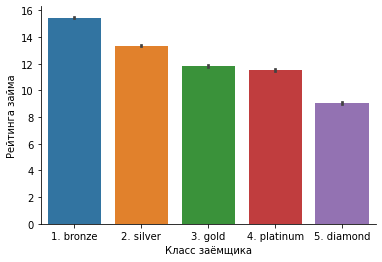

In [32]:
ax = sns.barplot(x='borrower_issue_class', y='loan_rating_int', data=loan_data, order = ['1. bronze','2. silver','3. gold','4. platinum','5. diamond'])
ax.set(xlabel='Класс заёмщика', ylabel='Рейтинга займа')  # подписываем оси
sns.despine()  # убрать часть рамки графика
plt.show() # чтобы показывался только график

### Построим график количества займов в зависимости от рейтинга займа и класса заёмщика.

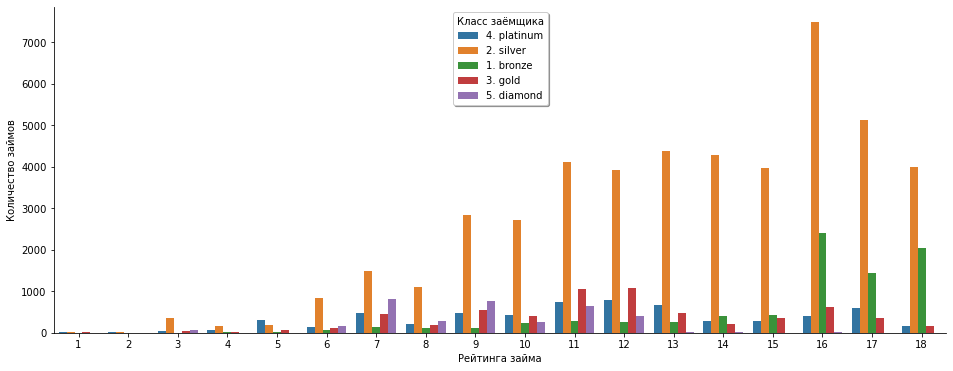

In [70]:
plt.figure(figsize = (16,6)) # указыв. размер графика, чтобы он был побольше
ax = sns.countplot(x='loan_rating_int', hue='borrower_issue_class', data=loan_data)
ax.set(xlabel='Рейтинга займа', ylabel='Количество займов')
sns.despine()
plt.legend(title = 'Класс заёмщика', shadow=True)
#plt.yticks(np.arange(0, 7000, 500))
plt.show()

Большинство клинетов компании имеют рейтинга займа свыше 6.

Большая часть клиентов имеет статус "SILVER", количество заёмщиков с таким статусом значительно преобладает во всех значениях рейтинга займов, кроме 5-го.Большая часть "DIAMOND" клиентов сконцентрировано в  значениях ретинга 6-12.Большинство заёмщиков статуса "BRONZE" имеют высокий кредитный рейтинг - 16-18.

### График количества займов в зависимости от рейтинга займа и статуса займа

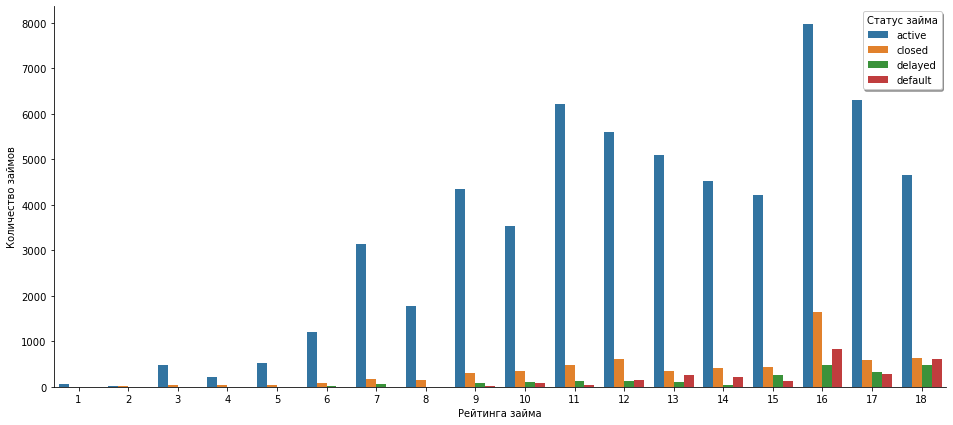

In [74]:
plt.figure(figsize = (16,7)) # казыв. размер графика, чтобы он был побольше
ax = sns.countplot(x='loan_rating_int', hue='loan_status_str', data=loan_data)
ax.set(xlabel='Рейтинга займа', ylabel='Количество займов')
sns.despine()
plt.legend(title = 'Статус займа', shadow=True)
plt.show()

Большая часть платежей находятся в статусе займа "active". Наибольшее количество займов в статусах "default" и "delayed" наблюдается при высоких значениях рейтинга займа - 16-18.

### График количества займов в зависимости от рейтинга займа и статуса платежа

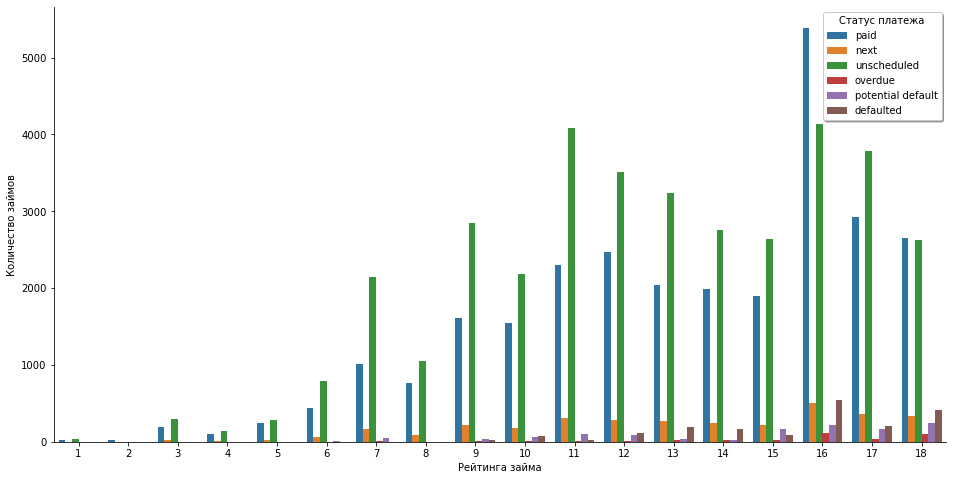

In [73]:
plt.figure(figsize = (16,8)) # казыв. размер графика, чтобы он был побольше
ax = sns.countplot(x='loan_rating_int', hue='status', data=loan_data)
ax.set(xlabel='Рейтинга займа', ylabel='Количество займов')
plt.legend(title = 'Статус платежа', shadow=True)
sns.despine()
plt.show()

Большая часть платежей находятся в статусах "paid" и "unscheduled", значительная доля платежей вносится досрочно во всех рейтингах, кроме 2-го. Наибольшее количество платежей в статусах "defaulted" и "potential default" наблюдается при высоких значениях рейтинга займа - 16-18.

# Вывод: 
- Заёмщики со статусом "DIAMOND" чаще всего имеют рейтинг займа от 6 до 12, что может свидетельствовать о наибольшей финансовой стабильности в этих значениях рейтинга займа.


-  Платежи в статусах "active", "paid" и "unscheduled" преобладают, что может свидетельствовать о своевременных и досрочных выплатах большинства заёмщиков.


- Статус "SILVER" имеет наибольшее количество заёмщиков во всех значениях рейтинга, кроме 5-го. Это может указывать на распространённость данного статуса среди клиентов компании.


 - Наибольшее количество проблемных платежей ("defaulted" и "potential default") наблюдается при высоких значениях рейтинга займа - 16-18. Это может быть связано с первым кредитом и отсутствующеей кредитной историей заёмщиков, а соответственно и высоким рейтингом займа.
 
**Таким образом, компания имеет стабильный поток платежей от большей части клиентов, но стоит обратить внимание на заёмщиков с высоким рейтингом займа(16-18), чтобы предотвратить возможные проблемы с задолженностями в будущем.**

# 2.	Проиллюстрируйте как менялось отношение Non-performing займов к общей выдаче по полю amount до сегодняшнего дня
●	К NPL платежам будем относить overdue_statuses = ['overdue','potential default', 'defaulted']

●	Будем считать, что займы становятся просроченными безвозвратно.

●	Будем считать, что в момент возникновения просроченного платежа в NPL уходит вся оставшаяся сумма займа.  


#### Выделим платежи со статусом 'overdue','potential default','defaulted'.

In [95]:
df_NPL = loan_data.query('status in ["overdue","potential default","defaulted"]')
df_NPL.head()

,id,number,payment_date,status,amount,start_date,loan_rating_int,loan_status_str,restruct_status,auto_approval,borrower_issue_class
169,12495,13,2024-02-15 03:00:00,overdue,64461.6,2023-01-09 07:23:00.226095,13,delayed,no restruct,No auto-approve,2. silver
171,12495,15,2024-04-15 03:00:00,potential default,56989.4,2023-01-09 07:23:00.226095,13,delayed,no restruct,No auto-approve,2. silver
172,12495,16,2024-05-15 03:00:00,potential default,56824.9,2023-01-09 07:23:00.226095,13,delayed,no restruct,No auto-approve,2. silver
173,12495,17,2024-06-15 03:00:00,potential default,56743.6,2023-01-09 07:23:00.226095,13,delayed,no restruct,No auto-approve,2. silver
174,12495,18,2024-07-15 03:00:00,potential default,56583.0,2023-01-09 07:23:00.226095,13,delayed,no restruct,No auto-approve,2. silver


In [77]:
df_NPL.status.unique() #проверка

array(['overdue', 'potential default', 'defaulted'], dtype=object)

In [78]:
df_NPL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3452 entries, 169 to 70929
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3452 non-null   int64         
 1   number                3452 non-null   int64         
 2   payment_date          3446 non-null   datetime64[ns]
 3   status                3452 non-null   object        
 4   amount                3452 non-null   float64       
 5   start_date            3452 non-null   datetime64[ns]
 6   loan_rating_int       3452 non-null   int64         
 7   loan_status_str       3452 non-null   object        
 8   restruct_status       3452 non-null   object        
 9   auto_approval         3452 non-null   object        
 10  borrower_issue_class  3452 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(5)
memory usage: 323.6+ KB


#### Найдём сумму Non-performing займов по месяцам до текущей даты.

In [96]:
min_payment_date_NPL = df_NPL.payment_date.min() # минимальная дата в таблице просроченых займов 
min_payment_date_NPL

Timestamp('2023-03-30 03:00:00')

In [97]:
current_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S') # текущая дата
current_time

'2024-03-31 09:55:42'

In [98]:
df_NPL = df_NPL.query('@min_payment_date_NPL<payment_date<=@current_time') # оставим займы за прошедщий год до тек.даты
df_NPL.head()

,id,number,payment_date,status,amount,start_date,loan_rating_int,loan_status_str,restruct_status,auto_approval,borrower_issue_class
169,12495,13,2024-02-15 03:00:00,overdue,64461.6,2023-01-09 07:23:00.226095,13,delayed,no restruct,No auto-approve,2. silver
241,12499,14,2024-03-05 03:00:00,overdue,39171.6,2023-01-05 11:46:52.959325,15,delayed,no restruct,No auto-approve,2. silver
348,12506,8,2023-09-07 03:00:00,overdue,242561.0,2023-01-09 18:14:18.089674,15,default,no restruct,No auto-approve,2. silver
349,12506,9,2023-10-07 03:00:00,overdue,263909.0,2023-01-09 18:14:18.089674,15,default,no restruct,No auto-approve,2. silver
350,12506,10,2023-11-07 03:00:00,overdue,280035.0,2023-01-09 18:14:18.089674,15,default,no restruct,No auto-approve,2. silver


In [99]:
# сумма Non-performing займов по месяцам до текущей даты
df_NPL = df_NPL.groupby(df_NPL['payment_date'].dt.to_period('M'))\
                .agg({'amount':'sum'})\
                .rename(columns={'amount':'sum_amount_NPL'})\
                .sort_index()
df_NPL

,sum_amount_NPL
payment_date,
2023-04,2140164.00
2023-05,4546571.25
2023-06,1102724.64
2023-07,2971285.20
2023-08,6022791.09
2023-09,8310590.26
2023-10,10075960.37
2023-11,12352385.43
2023-12,15786884.67


#### Найдём сумму займов по месяцам до текущей даты

In [100]:
min_payment_date = loan_data.payment_date.min() # минимальная дата в таблице займов 
min_payment_date

Timestamp('2023-02-01 03:00:00')

In [101]:
loan_df = loan_data.query('@min_payment_date<payment_date<=@current_time') # оставим займы за прошедщий год до тек.даты
loan_df.head()

,id,number,payment_date,status,amount,start_date,loan_rating_int,loan_status_str,restruct_status,auto_approval,borrower_issue_class
0,12436,1,2023-02-20 03:00:00,paid,532362.0,2023-01-04 15:22:07.106088,10,active,no restruct,No auto-approve,4. platinum
1,12436,2,2023-03-20 03:00:00,paid,521224.0,2023-01-04 15:22:07.106088,10,active,no restruct,No auto-approve,4. platinum
2,12436,3,2023-04-20 03:00:00,paid,522177.0,2023-01-04 15:22:07.106088,10,active,no restruct,No auto-approve,4. platinum
3,12436,4,2023-05-20 03:00:00,paid,521007.0,2023-01-04 15:22:07.106088,10,active,no restruct,No auto-approve,4. platinum
4,12436,5,2023-06-20 03:00:00,paid,520816.0,2023-01-04 15:22:07.106088,10,active,no restruct,No auto-approve,4. platinum


In [102]:
# сумму займов по месяцам до текущей даты
loan_df = loan_df.groupby(loan_df['payment_date'].dt.to_period('M'))\
                .agg({'amount':'sum'})\
                .rename(columns={'amount':'sum_amount'})\
                .sort_index()
loan_df

,sum_amount
payment_date,
2023-02,3.953501e+07
2023-03,7.652209e+07
2023-04,1.419092e+08
2023-05,1.996393e+08
2023-06,2.773456e+08
2023-07,3.221857e+08
2023-08,4.112383e+08
2023-09,4.922702e+08
2023-10,5.727310e+08


In [103]:
# соединим датафреймы с суммой Non-performing займов и всех займов

merge = pd.merge(loan_df, df_NPL, on='payment_date').reset_index()
merge

,payment_date,sum_amount,sum_amount_NPL
0,2023-04,1.419092e+08,2140164.00
1,2023-05,1.996393e+08,4546571.25
2,2023-06,2.773456e+08,1102724.64
3,2023-07,3.221857e+08,2971285.20
4,2023-08,4.112383e+08,6022791.09
5,2023-09,4.922702e+08,8310590.26
6,2023-10,5.727310e+08,10075960.37
7,2023-11,6.198010e+08,12352385.43
8,2023-12,7.993564e+08,15786884.67
9,2024-01,8.013135e+08,20102518.80


In [104]:
# отношение NPL к общей сумме займов в процентах
merge['NPL_percent,%'] = (merge['sum_amount_NPL']/merge['sum_amount']*100).round(2)
merge

,payment_date,sum_amount,sum_amount_NPL,"NPL_percent,%"
0,2023-04,1.419092e+08,2140164.00,1.51
1,2023-05,1.996393e+08,4546571.25,2.28
2,2023-06,2.773456e+08,1102724.64,0.40
3,2023-07,3.221857e+08,2971285.20,0.92
4,2023-08,4.112383e+08,6022791.09,1.46
5,2023-09,4.922702e+08,8310590.26,1.69
6,2023-10,5.727310e+08,10075960.37,1.76
7,2023-11,6.198010e+08,12352385.43,1.99
8,2023-12,7.993564e+08,15786884.67,1.97
9,2024-01,8.013135e+08,20102518.80,2.51


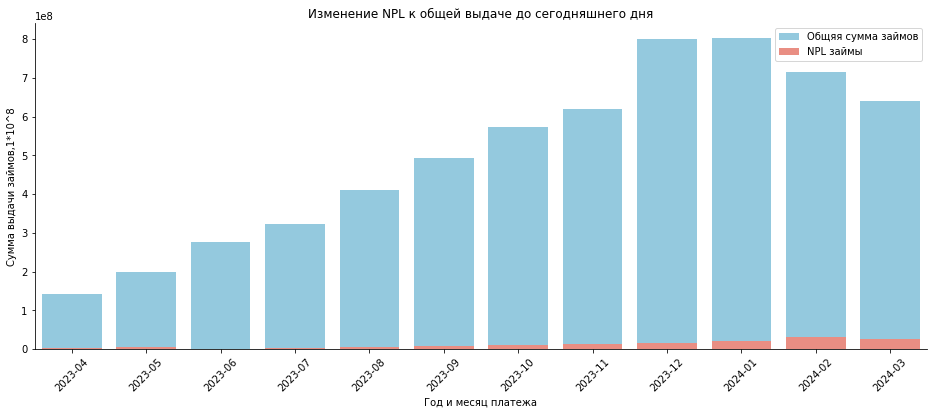

In [123]:
plt.figure(figsize = (16,6)) 
ax =sns.barplot(x='payment_date', y='sum_amount', data=merge, color='skyblue', label='Общяя сумма займов')
ax = sns.barplot(x='payment_date', y='sum_amount_NPL', data=merge, color='salmon', label='NPL займы')
plt.xticks(rotation=45)
ax.set(xlabel='Год и месяц платежа', ylabel='Сумма выдачи займов,1*10^8', title='Изменение NPL к общей выдаче до сегодняшнего дня')
plt.legend()
sns.despine() 
plt.show()

На графике можно наблюдать изменение отношения Non-performing займов к общей выдаче в течение времени. Согласно графику количество Non-performing займов увеличиваются как в абсолютном, так и в относительном значении к концу 2023 года и началу 2024. Наибольшие значения наблюдаются в ферале 2024 года.

# Вывод:
Можно сделать вывод о росте проблем с займами к концу 2023 года и началу 2024. Наибольшие значения NP займов наблюдаются в феврале 2024 года, что может свидетельствовать о возможных проблемах с возратом займов в это время. Необходимо провести более детальный анализ для выявления причин увеличения NP займов, чтобы уменьшить риски финансовых потерь компании и кредиторов.

## 3.	Проведите когортный анализ дефолтности в разрезе месяца выдачи займа

●	Ушедшими в дефолт будем считать платежи в статусе status == "defaulted"

●	Сумму дефолта по когорте считать накопленным итогом от месяца к месяцу


1. Признак формирования когорты — дата взятие займа
2. Размер когорты — месяц
3. Отчетный период — 2023 год
4. Анализируемый ключевой показатель: Сумма дефолта от месяца к месяцу

Введём даты отчётного периода в формате "YYYY-MM-DD":

In [262]:
first_date = pd.to_datetime('2023-01-01')

In [263]:
end_date = pd.to_datetime('2023-12-31')

Выберем платежи со статусом defaulted и датой выдачи займа в выбранный период

In [273]:
cohort_analysis = loan_data.query('@first_date<=start_date<=@end_date')
cohort_analysis.head()

,id,number,payment_date,status,amount,start_date,loan_rating_int,loan_status_str,restruct_status,auto_approval,borrower_issue_class
0,12436,1,2023-02-20 03:00:00,paid,532362.0,2023-01-04 15:22:07.106088,10,active,no restruct,No auto-approve,4. platinum
1,12436,2,2023-03-20 03:00:00,paid,521224.0,2023-01-04 15:22:07.106088,10,active,no restruct,No auto-approve,4. platinum
2,12436,3,2023-04-20 03:00:00,paid,522177.0,2023-01-04 15:22:07.106088,10,active,no restruct,No auto-approve,4. platinum
3,12436,4,2023-05-20 03:00:00,paid,521007.0,2023-01-04 15:22:07.106088,10,active,no restruct,No auto-approve,4. platinum
4,12436,5,2023-06-20 03:00:00,paid,520816.0,2023-01-04 15:22:07.106088,10,active,no restruct,No auto-approve,4. platinum


In [274]:
#оставим только год и месяц
cohort_analysis['start_date'] = cohort_analysis.start_date.dt.to_period('M') 
cohort_analysis.head()

<ipython-input-274-967bfa43a037>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_analysis['start_date'] = cohort_analysis.start_date.dt.to_period('M')


,id,number,payment_date,status,amount,start_date,loan_rating_int,loan_status_str,restruct_status,auto_approval,borrower_issue_class
0,12436,1,2023-02-20 03:00:00,paid,532362.0,2023-01,10,active,no restruct,No auto-approve,4. platinum
1,12436,2,2023-03-20 03:00:00,paid,521224.0,2023-01,10,active,no restruct,No auto-approve,4. platinum
2,12436,3,2023-04-20 03:00:00,paid,522177.0,2023-01,10,active,no restruct,No auto-approve,4. platinum
3,12436,4,2023-05-20 03:00:00,paid,521007.0,2023-01,10,active,no restruct,No auto-approve,4. platinum
4,12436,5,2023-06-20 03:00:00,paid,520816.0,2023-01,10,active,no restruct,No auto-approve,4. platinum


In [275]:
cohort_analysis = cohort_analysis.query('status == "defaulted"')\
                                .groupby(['start_date','status'])\
                                .agg({'loan_rating_int':'count','amount':'sum'})\
                                .rename(columns={'loan_rating_int':'count_defaulted','amount':'sum_defaulted'})
cohort_analysis

,,count_defaulted,sum_defaulted
start_date,status,,
2023-01,defaulted,165,21413052.17
2023-02,defaulted,119,12726050.62
2023-03,defaulted,191,26691040.84
2023-04,defaulted,156,27413818.52
2023-05,defaulted,121,22364916.00
2023-06,defaulted,237,43563105.00
2023-07,defaulted,167,24869366.04
2023-08,defaulted,290,32724592.10
2023-09,defaulted,147,17991990.20


In [276]:
cohort_analysis = cohort_analysis.reset_index()

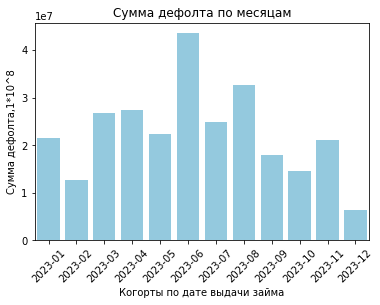

In [280]:
sns.barplot(x='start_date', y='sum_defaulted', data=cohort_analysis, color='skyblue')
plt.xlabel('Когорты по дате выдачи займа')
plt.ylabel('Сумма дефолта,1*10^8')
plt.title('Сумма дефолта по месяцам')
plt.xticks(rotation=45)
plt.show()

# Вывод:
Наибольшую сумму дефолта генерируют займы взятые в июне 2023 года.Это может указывать на то, что заёмщики, взявшие займ в июне 2023 года, столкнулись с финансовыми трудностями или другими обстоятельствами, препятствующими им вовремя вернуть заемные средства.